# Análisis tienda ICE

## Descripción del proyecto 
---

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.


### Objetivo 

El objetivo de este proyecto es identificar los factores que determinan el éxito de los videojuegos en función de diversas características y métricas de ventas en distintas plataformas y regiones.

Las acciones a realizar: 
- Paso 1: Cargar y explorar los datos
- Paso 2: Manipulación de datos
- Paso 3: Análisis de datos
- Paso 4: Pruebas de hipótesis

## Cargar y explorar los datos
---

En esta sección, comenzaremos cargando las bibliotecas necesarias y los datos proporcionados. Luego, realizaremos una exploración inicial del conjunto de datos para comprender su estructura. Esto incluirá:

- Verificar el tamaño del dataset (número de filas y columnas)
- Examinar los tipos de datos en cada columna
- Identificar la presencia de valores faltantes o atípicos que puedan requerir tratamiento antes de proceder con el análisis.

### Cargar ambiente
Importamos las bibliotecas esenciales para el análisis.

In [124]:
## Cargar el ambiente de trabajo
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import ttest_ind, levene

### Cargar dataset
Leemos el archivo de datos proporcionado por analizar. 

In [3]:
# cargar los datos
df_games = pd.read_csv("../data/games.csv")

### Exploración del dataset
En esta etapa, realizaremos un análisis preliminar del dataset para comprender su estructura y calidad. 

In [4]:
## Visualización del df
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
## Información general
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Valores duplicados exoplícitos
print(df_games.duplicated().sum())

## Identificación de los valores duplicados
df_games[df_games.duplicated()]

0


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating


In [7]:
# Valores duplicados implícitos
## Número de juegos repetidos
df_games.duplicated(subset = "Name").sum()

games_duplicated = df_games[df_games.duplicated(subset = "Name")].sort_values("Name")

print("Número de juegos repetidos:", len(games_duplicated))
print("Número de juegos únicos repetidos:", games_duplicated["Name"].nunique())

Número de juegos repetidos: 5155
Número de juegos únicos repetidos: 2805


In [8]:
## Valores faltantes
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
## Estadística descriptiva para columnas numéricas
round(df_games.describe(),2)

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [10]:
## Estadísticas descriptivas para columnas categóricas
df_games.describe(include="object")

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


### Resumen 

El DataFrame de Ice contiene 16,715 observaciones y 11 variables, proporciona datos sobre el lanzamiento de videojuegos y las ganancia en 3 principales mercados: Norteamérica, Europa y Japón. 

Durante la exploración inicial, identificamos los siguientes problemas: 

- Los nombres de las columnas se encuentran en *snake case* con mayúsculas.
- La columna `Year_of_Release` se encuentra en formato float. 
- La columna `User_Score` se encuentra como objeto. 

En general, no encontramos datos duplicados explícitos. Sin embargo, al analizar la variable `Name` para duplicados implícitos, encontramos 5,155 casos en los que un mismo videojuego se distribuye en distintas plataformas. Esto sugiere que los datos no están en formato tidy, ya que cada fila no representa una observación única en sí misma. 

Respecto a los valores faltantes: 
- Las variables `Name`, `Genre` y `Year_of_Release` presentan ausencias en escasos registros, representando menos del 5% de los datos. 
- Las variables como `Critic_Score`, `User_Score` y `Rating` muestran entre un 40% y 55% de valores faltantes.  

De manera preliminar, notamos que el juego con mayor distribución entre plataformas el Need for Spped: Most Wanted; la plataforma con un mayor número de videojuegos es la PS2; el género más representativo es de Acción. En cuanto a la clasificación, la más frecuente es la E, lo que indica una preferencia del mercado hacia juegos para toda la familia. 

El mercado estadounidense tiene en promedio el mayor número de ventas. En este mercado se registó el valor máximo de ventas. 

## Manipulación de datos
---

En esta etapa, abordamos los errores identificados en el DataFrame, lo que nos permite preparar los datos para un análisis más adecuado.

Los errores observados fueron los siguientes: 
- Los nombres de las columnas se encuentran en *snake case* con mayúsculas.
- La columna `Year_of_Release` se encuentra en formato float. 
- La columna `User_Score` se encuentra como objeto. 
- Las variables `Name`, `Genre` y `Year_of_Release` presentan ausencias en escasos registros, representando menos del 5% de los datos. 
- Las variables como `Critic_Score`, `User_Score` y `Rating` muestran entre un 40% y 55% de valores faltantes.  

### Correciones de formato

1. Correción del formato *snake case* con mayúsculas a minúsculas.

In [11]:
## Poner en minúsculas los nombres de las columnas
df_games.columns = df_games.columns.str.lower()

2. Conversión de la variable `year_of_release` de tipo float a fecha. 

In [12]:
## Convertir a formato fecha
df_games["year_of_release"] = pd.to_datetime(df_games["year_of_release"], format="%Y").dt.year

> EL resultado de la conversión fue tipo float nuevamente. 

3. Conversión de la variable `user_score` de tipo object a tipo float.

In [13]:
## Convertir a formato float
df_games["user_score"]= pd.to_numeric(df_games["user_score"], errors="coerce")

### Valores faltantes

1. Inspección de la variable `name`

In [14]:
# Inspección valores faltantes Name
## Identificar los videojuegos sin registro
df_games[df_games["name"].isna()]

## Rellenar los valores por Unknown
df_games["name"]= df_games["name"].fillna("Unknown")

1. Inspección de la variable `genre`

In [15]:
# Inspección valores faltantes Genre
## Identificar los videojuegos sin registro
df_games[df_games["genre"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,Unknown,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,Unknown,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Al inspeccionar los datos, encontramos un videojuego sin nombre pero con los demás metadatos completos, por lo que reemplazamos el valor NaN en el nombre por `Unknown`.
 
Sin embargo, este mismo videojuego carece de datos en la columna de género. Es posible que esta falta de información esté relacionada con su antigüedad (1993) y limitaciones de los registros disponibles. Considerando que estos datos representan menos del 1% del total, hemos decidido eliminarlos del análisis para mantener la integridad y consistencia de los resultados

In [16]:
## Eliminar los registros de los videojuegos sin nombre
df_games= df_games[~(df_games["name"] == "Unknown")] 

3. Inspección de la variable `year_of_release`

In [17]:
# Inspección valores faltantes año 
## Identificar patrones en el año de lanzamiento
df_games[df_games["year_of_release"].isna()].sort_values(["platform", "genre"]).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1585,Combat,2600,NaN,Action,1.17,0.07,0.0,0.01,NaN,NaN,NaN
4220,Circus Atari,2600,NaN,Action,0.43,0.03,0.0,0.00,NaN,NaN,NaN
4337,Maze Craze: A Game of Cops 'n Robbers,2600,NaN,Action,0.42,0.02,0.0,0.00,NaN,NaN,NaN
5800,Slot Machine,2600,NaN,Action,0.29,0.02,0.0,0.00,NaN,NaN,NaN
6299,Flag Capture,2600,NaN,Action,0.25,0.02,0.0,0.00,NaN,NaN,NaN


In [18]:
df_games[df_games["year_of_release"].isna()].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3997,Wet,X360,NaN,Shooter,0.23,0.21,0.01,0.05,69.0,7.3,M
9218,Bejeweled 3,X360,NaN,Puzzle,0.13,0.00,0.00,0.01,78.0,8.4,E
11016,Samurai Shodown Anthology,PSP,NaN,Fighting,0.08,0.00,0.00,0.01,NaN,NaN,T
12011,McFarlane's Evil Prophecy,PS2,NaN,Action,0.03,0.03,0.00,0.01,34.0,3.2,M
8740,Home Run,2600,NaN,Sports,0.14,0.01,0.00,0.00,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
3233,Test Drive Unlimited 2,PS3,NaN,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T
2281,Namco Museum,XB,NaN,Misc,0.77,0.11,0.00,0.04,59.0,NaN,E
10050,Star Trek: Conquest,PS2,NaN,Strategy,0.06,0.04,0.00,0.01,54.0,9.1,E


En los datos de la variable `year_of_release`, no observamos un patrón específico de años de lanzamiento; los videojuegos incluyen plataformas muy antiguas como el Atari 2600 y relativamente actuales como el Wii. Dado que los valores ausentes en esta columna representan solo el 2% de los datos, hemos decidido no imputarlos, ya que su impacto en el análisis es mínimo y evitamos introducir posibles sesgos. 

4. Inspección de la variable `critic_score`. 

In [19]:
# Inspección valores faltantes critic_score
## Identificar los videojuegos sin registro
df_games[df_games["critic_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Para la variable `critic_score`, realizamos una exploración visual mediante un histograma.

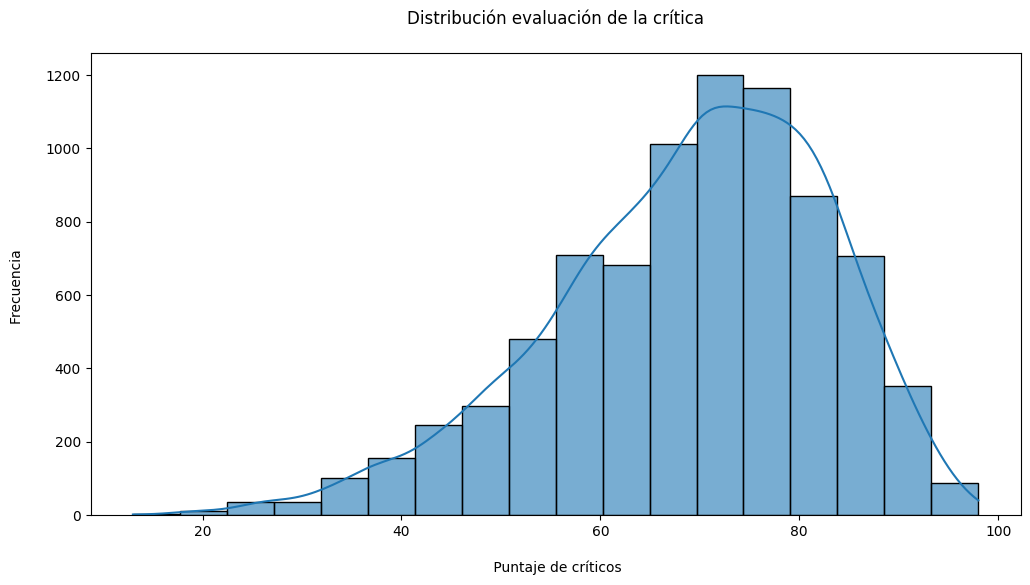

In [20]:
# Observar la distribución de la variable
## Crea el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_games, 
            x="critic_score",
            kde= True, bins=18,alpha=0.6)
plt.title("Distribución evaluación de la crítica\n")
plt.xlabel(" \n Puntaje de críticos")
plt.ylabel("Frecuencia \n")
plt.show()

Dado que los valores de la media y la mediana son casi idénticos y la distribución se aproxima a una normal, decidimos imputar los valores ausentes utilizando el promedio, lo que nos permite no perder una parte considerable de los datos para analizar.

In [21]:
# Imputar los valores ausentes
## Determinar el promedio 
critic_score_mean= df_games["critic_score"].mean(skipna=True)

## Rellenar los valores ausentes con el promedio
df_games.loc[:,"critic_score"]= df_games["critic_score"].fillna(critic_score_mean)

5. Inspección de la variable `user_score`

In [22]:
# Inspección valores faltantes user_score
## Identificar los videojuegos sin registro
df_games[df_games["user_score"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,68.967679,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,68.967679,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,68.967679,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,68.967679,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,68.967679,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,68.967679,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,68.967679,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,68.967679,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,68.967679,NaN,NaN


En la variable `user_score`, notamos que el valor más frecuente es `tbd`, que indica que el puntaje no ha sido determinado. Si etiquetáramos estos valores de esta manera, perderíamos más de la mitad de los datos (51%), lo que afectaría significativamente el análisis

Al revisar el resumen descriptivo y el histograma, observamos que los datos se asemejan a una distribución normal, aunque presentan un sesgo negativo. 

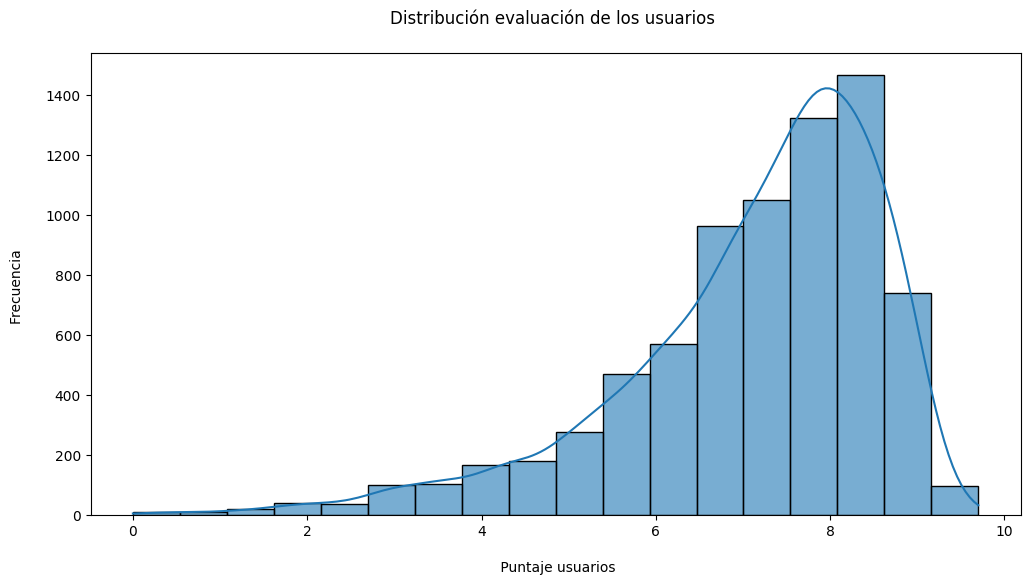

In [23]:
# Observar la distribución de la variable
## Crea el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_games, 
            x="user_score",
            kde= True, bins=18,alpha=0.6)
plt.title("Distribución evaluación de los usuarios \n")
plt.xlabel(" \n Puntaje usuarios")
plt.ylabel("Frecuencia \n")
plt.show()

Por lo tanto, decidimos imputar los valores ausentes utilizando la mediana, lo que nos permitirá mantener los datos para realizar nuestro análisis.

In [24]:
# Imputar los valores ausentes
## Determinar la mediana 
user_score_median= df_games["user_score"].median(skipna=True)

## Rellenar los valores ausentes con el promedio
df_games.loc[:,"user_score"]= df_games["user_score"].fillna(user_score_median)

6. Inspección de la variable `rating`. 

In [25]:
# Imputar los valores ausentes
## Rellenar valores con "tbd"
df_games["rating"] = df_games["rating"].fillna("tbd")

Dado que un 40% de los datos aún no tienen una clasificación asignada, decidimos etiquetar los valores faltantes como `tbd`, en espera de una futura asignación. Optamos por no imputar estos datos, ya que la clasificación ESRB debe ser proporcionada por la Junta de Clasificación de Software de Entretenimiento, representando información sensible. Además, al tratarse de datos categóricos, es apropiado mantener la etiqueta como "en espera" o `tbd` hasta que se determinen.

### Modificaciones 

Realizamos la suma total de ganacias generadas para cada juego sumando el dinero recaudado en los 3 mercados más importantes y el alcanzado en otras regiones: 

In [26]:
## Calculo ganancias totales por videojuego
df_games["total_sales"] = df_games["na_sales"]+ df_games["eu_sales"]+ df_games["jp_sales"]+ df_games["other_sales"]

Finalmente, previo al análisis de los datos decidimos convertir el DataFrame en formato tidy para los posteriores análisis. 

In [27]:
## Conversión a formato Tiddy
tidy_games = df_games.melt(id_vars=
                        ["name", "platform", "year_of_release", "genre",
                        "critic_score", "user_score", "rating"],
                value_vars=["na_sales", "eu_sales", "jp_sales", "other_sales", "total_sales"],
                var_name="region",
                value_name="sales")

### Resumen 

Los pasos realizados en la tabla fueron los siguientes:

- Correción de formato de los nombres de las variables a *snale case* convencional. 
- Conversión de `year_of_release` en formato datime.
- Conversión de `user_score` en formato float.
- Cambio de los valores ausentes de `name` por `Unknown`
- Eliminación de los videojuegos con nombre desconocido. 
- Cambio de los valores ausentes de `critic_score` por el promedio.  
- Cambio de los valores ausentes de `user_score` por la mediana. 
- Camnbio de los valores ausentes de `rating` por `tbd`.
- Tranformación de la dataframe a formato tidy. 

## Análisis de datos
En esta sección, realizamos un análisis de los datos de plataformas, géneros, fechas de lanzamiento y ventas por región de distintos videojuegos para contestar una serie de preguntas.


### Lanzamiento de videojuegos por año
Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [28]:
## Contar el número de videojuegos agriupados por año
total_games_year = df_games.groupby(by="year_of_release")["name"].count().reset_index().sort_values(by="year_of_release")

## Renombrar columna 
total_games_year  = total_games_year.rename(columns={"name": "total_games"})

In [29]:
total_games_year.head()

,year_of_release,total_games
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14


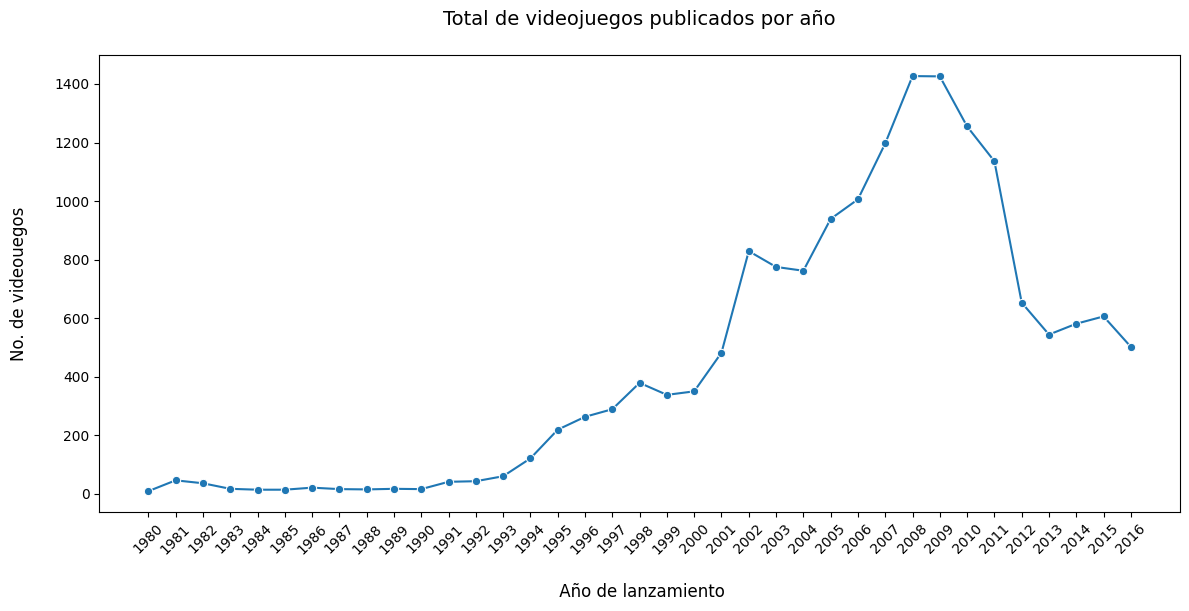

In [30]:
# Crear el gráfico cde líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x="year_of_release", y="total_games", data=total_games_year, marker="o")

# Personalizar el gráfico
plt.title("Total de videojuegos publicados por año\n", fontsize=14)
plt.xlabel("\n Año de lanzamiento", fontsize=12)
plt.ylabel("No. de videouegos\n", fontsize=12)
plt.tight_layout()

plt.xticks(ticks=total_games_year["year_of_release"], rotation=45)
# Mostrar el gráfico
plt.show()

El lanzamiento de videojuegos muestra un desarrollo desde 1995, con un crecimiento constante que alcanza su primer pico en 1997-1998. Aunque se observa una leve disminución en 1999, el número de lanzamientos vuelve a crecer rápidamente, alcanzando un nuevo máximo en 2001-2002. 

De 2005 a 2008, el crecimiento es aún más pronunciado, marcando el punto más alto en 2008. Después de este año, la industria experimenta un descenso gradual hasta 2012, cuando el número de juegos registrados cae a aproximadamente la mitad. 

Es posible que esta caída este relacionada con la actualización de la base de datos, lo que es importante confirmar con el supervisor. Sin embargo, el patrón de crecimiento y caída puede también explicarse por la transición de nuevas plataformas en la industria de los videojuegos.

Sería interesante evaluar la progresión en el tiempo del desarrollo de los videojuegos. 

Finalmente observamos el número de juegos desarrollados entre 4 años específicos. En 1998, donde encontramos el primer pico, 2008 donde encontramos un máximo, 2010 donde empieza la disminución en el número de juegos y finalmente 2016 con el último año del registro. 

In [31]:
## Filtrar solo las observaciones de años específicos
total_games_interested_years= total_games_year[total_games_year["year_of_release"].isin([1998, 2008, 2010, 2016])]

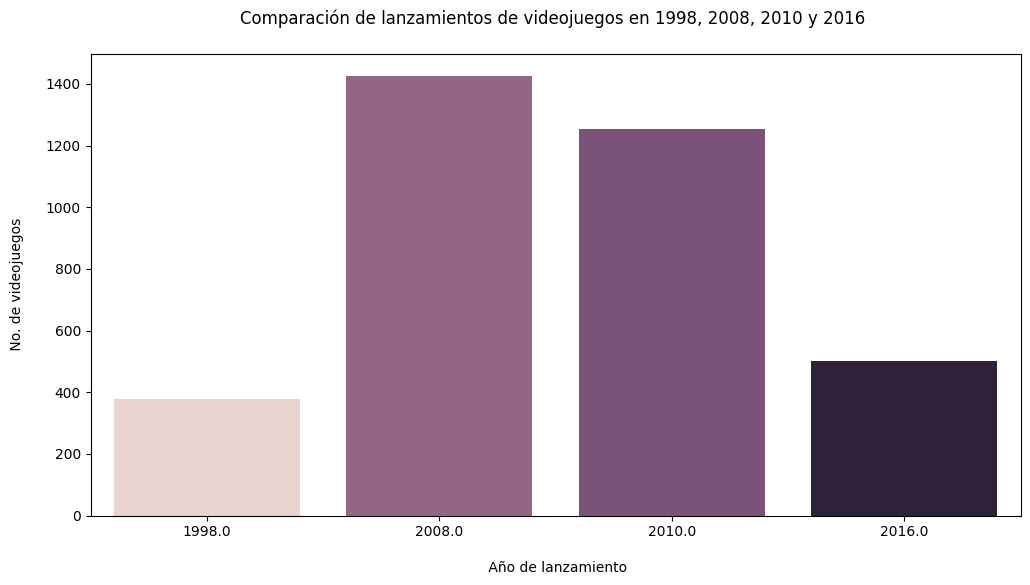

In [32]:
# Crear un gráfico de barras para comparar
plt.figure(figsize=(12, 6))
sns.barplot(x="year_of_release", y="total_games", data=total_games_interested_years, 
            hue="year_of_release", legend=False)
plt.title("Comparación de lanzamientos de videojuegos en 1998, 2008, 2010 y 2016 \n")
plt.xlabel("\n Año de lanzamiento")
plt.ylabel(" No. de videojuegos \n ")
plt.show()

Como podemos notar, existe una diferencias entre el número de juegos desarrollados a finales de los años 90 y la primer decada del año 2000. No se aprecia una diferencia entre el 2008 y 2010 donde se registraron los picos en el número de videojuegos. Pero si notamo que el número desciende para 2016. Esta observación puede darnos pistas sobre la falta de información registrada para este año.

### Número de ventas en las distintas plataformas
Observa cómo varían las ventas de una plataforma a otra

In [33]:
## Determinamos el total de ventas para cada plataforma
sales_platforms= df_games.groupby(by="platform", as_index=False)["total_sales"].sum().sort_values(by="total_sales")
sales_platforms

,platform,total_sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42
12,NG,1.44
22,SCD,1.86
3,DC,15.95
8,GEN,28.35
21,SAT,33.59


Observamos la distribución de las ventas en general mediante un histograma:

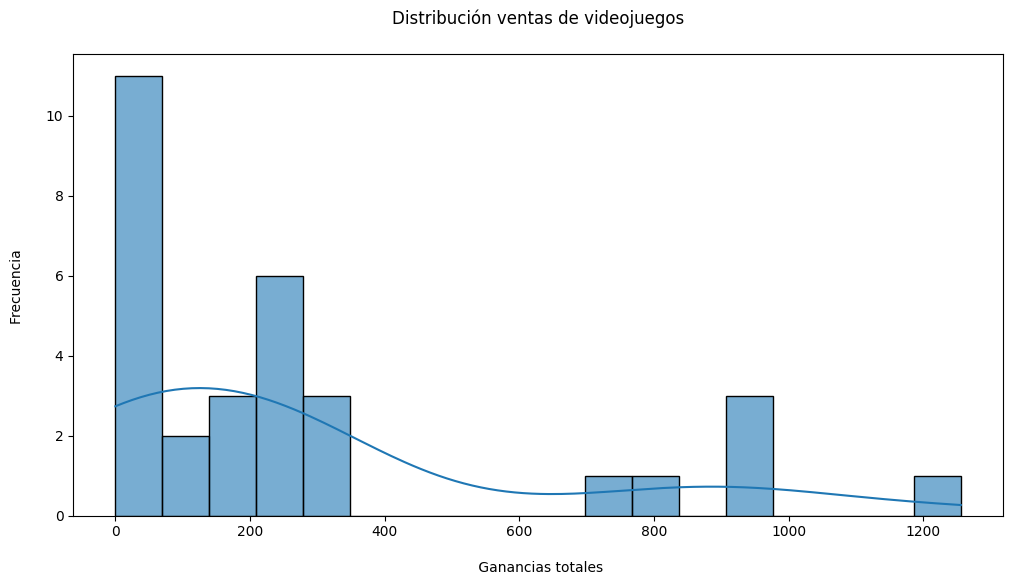

In [34]:
# Observar la distribución de la variable
## Crea el histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=sales_platforms, 
            x="total_sales",
            kde= True, bins=18,alpha=0.6)
plt.title("Distribución ventas de videojuegos\n")
plt.xlabel(" \n Ganancias totales")
plt.ylabel("Frecuencia \n")
plt.show()

Notamos que dentro de las 31 plataformas, existe una gran distribución en las ganancias, donde la gran mayoría registra ventas por debajo de los 400 MDD, mientras que existen pocas plataformas con mayores ganancias. 

Los datos de las empresas con menos de 100 MDD de ganancia fueron agrupadas en otras plataformas. Para ello creamos la variable `label_gains`.

In [35]:
# Agrupamos y etiquetamos aquellas plataformas con menos de 100 MDD de ventas en "Otras"
## Creamos la nueva etiqueta 
sales_platforms["label_gains"] = np.where(sales_platforms["total_sales"] < 100, "Other", sales_platforms["platform"])

## Número de plataformas diferentes
print("Número de plataformas:", sales_platforms["label_gains"].nunique())

Número de plataformas: 19


In [36]:
## Sumatoria ganancias totales videojuegos en otros
sales_platforms_condensed= sales_platforms.groupby("label_gains", as_index=False)["total_sales"].sum().sort_values(by="total_sales", ascending= False)

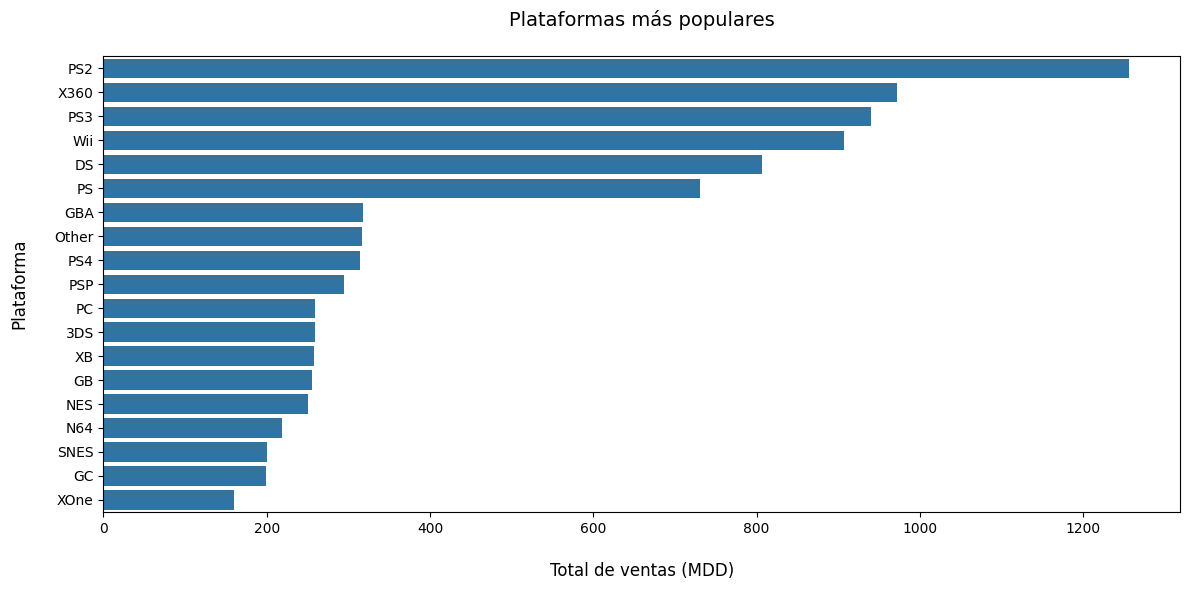

In [37]:
# Creación del gráfico 
# Ordenar las plataformas de mayor a menor por total de ventas
sorted_order = sales_platforms_condensed.sort_values(by="total_sales", ascending=False)["label_gains"]

# Crear el gráfico de barras horizontal ordenado
plt.figure(figsize=(12, 6))
sns.barplot(x="total_sales", y="label_gains", orient="h", 
            order= sorted_order, data=sales_platforms_condensed)

# Personalizar el gráfico
plt.title("Plataformas más populares\n", fontsize=14)
plt.xlabel("\nTotal de ventas (MDD)", fontsize=12)
plt.ylabel("Plataforma\n", fontsize=12)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

Observamos que las plataformas más populares a nivel global son el *PlayStation 2*, seguido por el *Xbox 360* y el *PlayStation 3*. Entre los primeros puestos, destaca el dominio de unas pocas empresas líderes: Sony Computer Entertainment, Microsoft y Nintendo. En particular, Sony sobresale con varias de sus consolas *PlayStation* ocupando los primeros lugares, mientras que Nintendo aparece con el *Wii* y el *DS*, y Microsoft se posiciona con el *Xbox 360*.

La popularidad y las ganancias registradas, especialmente en las plataformas más recientes, podrían atribuirse a una gran variedad de factores, algunos de ellos podrían incluir: 

- El creciente interés en los videojuegos a lo largo de los años y a las preferencias de consumidores tanto nuevos como recurrentes. 
- Una mayor accesibilidad y disponibilidad, tanto de las consolas como de los videojuegos

Sería interesante realizar un análisis más detallado para explorar la lealtad de los jugadores desde una edad temprana hasta la adultez. Además, de la relación entre el incremento en ventas de las plataformas y su accesibilidad, disponibilidad y precio.

### Plataformas más redituables
Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [38]:
## Contar el número de videojuegos agriupados por año
sales_platform_history = df_games.groupby(by=["platform", "year_of_release"])["total_sales"].sum().reset_index().sort_values(by="total_sales")

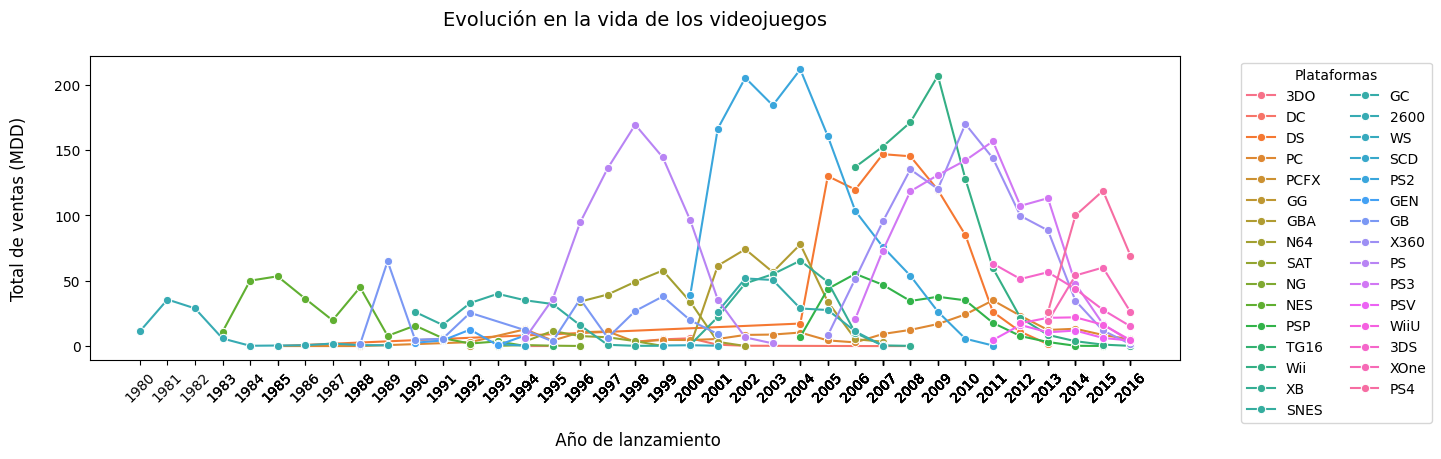

In [39]:
## Graficar número de ventas por año por plataforma
plt.figure(figsize=(12, 6))
sns.lineplot(x="year_of_release", y="total_sales", data=sales_platform_history, 
            hue="platform", marker="o")

# Personalizar el gráfico
plt.title("Evolución en la vida de los videojuegos\n", fontsize=14)
plt.xlabel("\n Año de lanzamiento", fontsize=12)
plt.ylabel("Total de ventas (MDD)\n", fontsize=12)
plt.tight_layout()

plt.xticks(ticks=sales_platform_history["year_of_release"], rotation=45)

plt.legend(title="Plataformas", bbox_to_anchor=(1.05, 1), loc="upper left", ncol=2)

# Mostrar el gráfico
plt.show()

Como notamos, existe mucho ruido en la visualización de los datos y no podemos observar un comportamiento específico. Por lo que utilizando el análisis previo filtramos algunas plataformas con mayores ventas que *a priori* conocemos la popularidad para notar algún patron en específico, en este caso utilizamos las siguientes plataformas: *Atari 2600*,*NES*, *SNES*, *N64*, *Wii*,*XB*, *X360*, *XOne* *PS*, *PS2*, *PS3*, *PS4*. 


In [40]:
## Definimos a priori plataformas más populares
popular_vector = ["2600","NES", "SNES", "N64", "Wii","XB", "X360", "XOne" "PS", "PS2", "PS3", "PS4"]

## Filtrar solo algunas plataformas
popular_games_year= sales_platform_history[sales_platform_history["platform"].isin(popular_vector)]

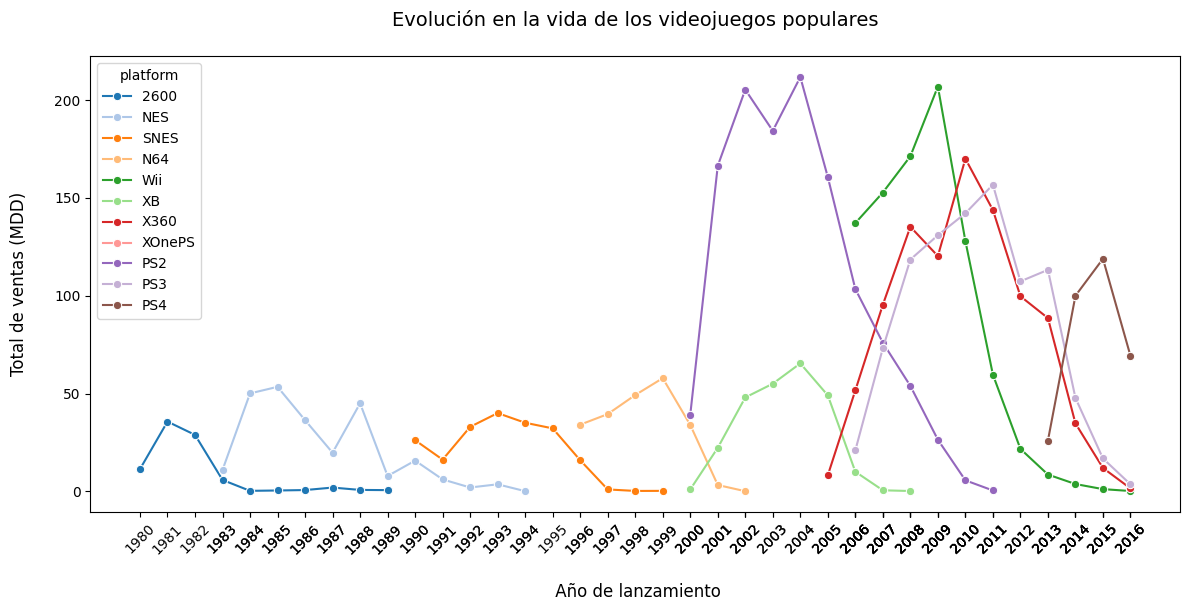

In [41]:
## Creación gráfico número de ventas por año por plataforma

## Definimos paleta de colores
tab_palette= sns.color_palette("tab20",11)

## Grafica puntos
plt.figure(figsize=(12, 6))
sns.lineplot(x="year_of_release", y="total_sales", data=popular_games_year, palette= tab_palette,
            hue="platform", hue_order=["2600","NES", "SNES", "N64", "Wii","XB", "X360", "XOne" "PS", "PS2", "PS3", "PS4"],
            marker="o")

# Personalizar el gráfico
plt.title("Evolución en la vida de los videojuegos populares\n", fontsize=14)
plt.xlabel("\n Año de lanzamiento", fontsize=12)
plt.ylabel("Total de ventas (MDD)\n", fontsize=12)
plt.tight_layout()

plt.xticks(ticks=popular_games_year["year_of_release"], rotation=45)
# Mostrar el gráfico
plt.show()

Observamos una evolución en las ventas de videojuegos a lo largo del tiempo, comenzando con el *Atari 2600*. Esta consola experimentó un pico de ventas en su año de lanzamiento, seguido por una disminución. En 1983, coincidiendo con una caída general en las ventas de videojuegos, el *Nintendo Entertainment System (NES)* emerge en el mercado, alcanzando ventas superiores a los 50 millones de dólares para 1985. Este patrón es común en la industria: **las consolas suelen alcanzar un máximo en ventas, tras el cual experimentan un descenso, justo cuando nuevas plataformas entran en escena y comienzan su propio ciclo de crecimiento**.

Un aspecto interesante en el análisis es el caso del *Xbox (XB)*, que logró superar los 100 millones de dólares en ventas, posiblemente gracias a una exitosa estrategia de marketing antes de su lanzamiento. Sin embargo, es importante considerar otros factores que también pudieron influir en este fenómeno.

A partir de 2010, las ventas de videojuegos muestran una tendencia general a la baja. La excepción es el *PlayStation 4*, que experimenta un crecimiento moderado en sus primeros años. Esta tendencia podría estar relacionada con la falta de datos actualizados sobre las consolas y videojuegos más recientes, lo que sugiere que la base de datos utilizada podría estar incompleta. Por lo tanto, es esencial interpretar estos resultados con cautela y considerar posibles actualizaciones futuras de la información.

Para responder la pregunta de cuanto tardan las nuevas plataformas en aparecer y cuanto en desaparecer. Determinamos los máximos y mínimos de cada una de las plataformas estudiadas y obtenemos la diferencia de años para determinar el ciclo de vida.

In [42]:
## Determinar el ciclo de vida de cada plataforma desde su registro inicial al registro final
ciclo_vida= popular_games_year.groupby("platform").agg(
    min_year = ("year_of_release", "min"),
    max_year = ("year_of_release", "max"))

## Calcular la diferencia para determinar el ciclo de vida
ciclo_vida["lifespan"]  = ciclo_vida["max_year"]- ciclo_vida["min_year"]
print(ciclo_vida)
print()

## Obtener el promedio del ciclo de vida de cada plataforma
print("El promedio del ciclo de vida de las plataformas consideradas populares es de :", ciclo_vida["lifespan"].mean())

          min_year  max_year  lifespan
platform                              
2600        1980.0    1989.0       9.0
N64         1996.0    2002.0       6.0
NES         1983.0    1994.0      11.0
PS2         2000.0    2011.0      11.0
PS3         2006.0    2016.0      10.0
PS4         2013.0    2016.0       3.0
SNES        1990.0    1999.0       9.0
Wii         2006.0    2016.0      10.0
X360        2005.0    2016.0      11.0
XB          2000.0    2008.0       8.0

El promedio del ciclo de vida de las plataformas consideradas populares es de : 8.8


De acuerdo con el análisis, podemos decir que el tiempo que tarda una nueva plataforma en aparecer y desaparecer es variable. Pero en general observamos que el ciclo de vida de las plataformas consideradas en nuestro estudio como populaes es de 8.8 años. Durante este tiempo, observamos que el tiempo en que aparece una nueva plataforma son 2 años a partir de su máximo apogeo de la antecesora y posteriormente tarda entre 5-7 años en desaparecer. 

> Esto no es del todo cierto en los últimos años, por lo que incitamos a la actualización en los datos recabados. 

### Selección de un periodo de interés 
Basándonos en nuestras observaciones, proponemos que el periodo adecuado para el análisis de los datos abarque **desde 2000 hasta 2013**. Este periodo se debe a que es el año donde tenemos el registro del aumento exponencial en videojuegos y ganancias, hasta el 2013 donde previamente identificamos de un punto de inflexión en los datos del 2009, relacionado con el declive de las plataformas de ese momento y el surgimiento de otras. Esto contrasta con las tendencias observadas previamente, donde se mostraba un incremento continuo en las ganancias generadas por diversas plataformas. 

Aunque algunas plataformas parecen mostrar una caída en las ventas, consideramos que esto podría deberse a la falta de información sobre las plataformas emergentes, más que a una verdadera disminución. Por este motivo, **no recomendamos construir un modelo para el año 2017** sin antes consultar con las partes interesadas y el supervisor. Si se decide seguir adelante, sería esencial obtener datos adicionales o proceder con extrema cautela.

In [43]:
## Selección de los datos dentro del periodo 2000-2013
df_games_selected = df_games[df_games["year_of_release"].between(2000, 2013)]

In [44]:
## Determinamos el total de ventas para cada plataforma dentro del periodo de interés
sales_platforms_selected= df_games_selected.groupby(by="platform", as_index=False)["total_sales"].sum().sort_values(by="total_sales")

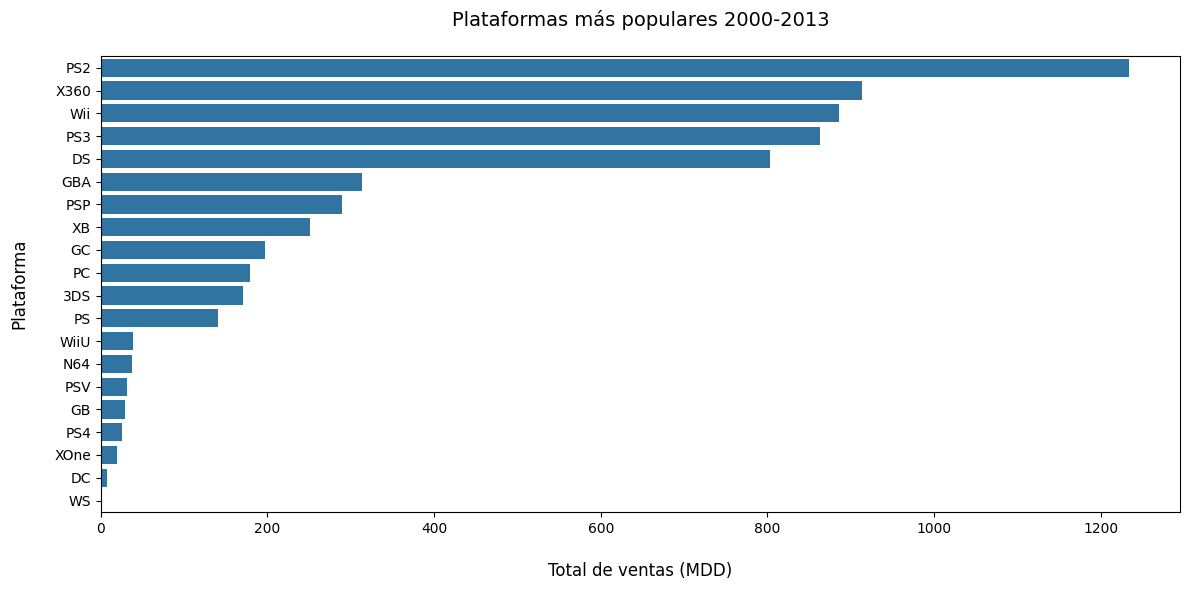

In [45]:
# Creación del gráfico 
# Ordenar las plataformas de mayor a menor por total de ventas
sorted_order_selected = sales_platforms_selected.sort_values(by="total_sales", ascending=False)["platform"]

# Crear el gráfico de barras horizontal ordenado
plt.figure(figsize=(12, 6))
sns.barplot(x="total_sales", y="platform", orient="h", 
            order= sorted_order_selected, data=sales_platforms_selected)

# Personalizar el gráfico
plt.title("Plataformas más populares 2000-2013\n", fontsize=14)
plt.xlabel("\nTotal de ventas (MDD)", fontsize=12)
plt.ylabel("Plataforma\n", fontsize=12)

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()

Notamos que al reducir nuestro análisis a un periodo de tiempo entre 2000 y 2013 existen cambios muy puntuales. El *PS2* sigue siendo la plataforma con mayor número de ventas, seguido por el *Xbox 360*. Sin embargo, existe un cambio en el tercer puesto, siendo ocupado por el *Wii* en lugar del *PS3*, que se recorre un lugar. De notar son el puesto que ocupan la *PS4* y el *Xbox One*, especialmente el *PS4* que baja del 9no als 17avo lugar. Esta plataforma salió al público a finales del año 2013 y principios del 2014, valdría la pena revizar un análisis del 2022 para visualizar su ciclo de vida.   

Realizamos un análisis exploratorio de las ventas realizadas unicamente para el periodo del  2014, en donde observamos que el PS3 empieza a decaer y aparece el surgimiento de otras plataformas: 

In [46]:
## Seleccionamos el periodo de interés
sales_platforms_actual = df_games[df_games["year_of_release"] == 2014]

## Sumatorioa de las ventas totales por plataforma
sales_platforms_actual.groupby("platform", as_index=False)["total_sales"].sum().sort_values(by="total_sales", ascending= False)

,platform,total_sales
3,PS4,100.00
9,XOne,54.07
2,PS3,47.76
0,3DS,43.76
8,X360,34.74
7,WiiU,22.03
1,PC,13.28
5,PSV,11.90
6,Wii,3.75
4,PSP,0.24


Como suponiamos, el *PS4* y el *XOne* son las dos consolas con mayor número de ventas para el 2014. No podemos guiarnos y hacer conclusiones a partir de la información de esta base de datos ya que está inconclusa.

Podemos concluir que, aunque algunas plataformas parecen mostrar una caída en las ventas, consideramos que esto podría deberse a la falta de información sobre las plataformas emergentes, más que a una verdadera disminución. Por este motivo, **no recomendamos construir un modelo para el año 2017** sin antes consultar con las partes interesadas y el supervisor. Si se decide seguir adelante, sería esencial obtener datos adicionales o proceder con extrema cautela.

En este análisis, utilizaremos los datos obtenidos en 2014, previamente seleccionados y almacenados en la base de datos sales_platforms_actual. Con el objetivo de explorar las ventas globales de videojuegos, generaremos un gráfico de cajas para visualizar de manera clara las diferencias entre las plataformas.

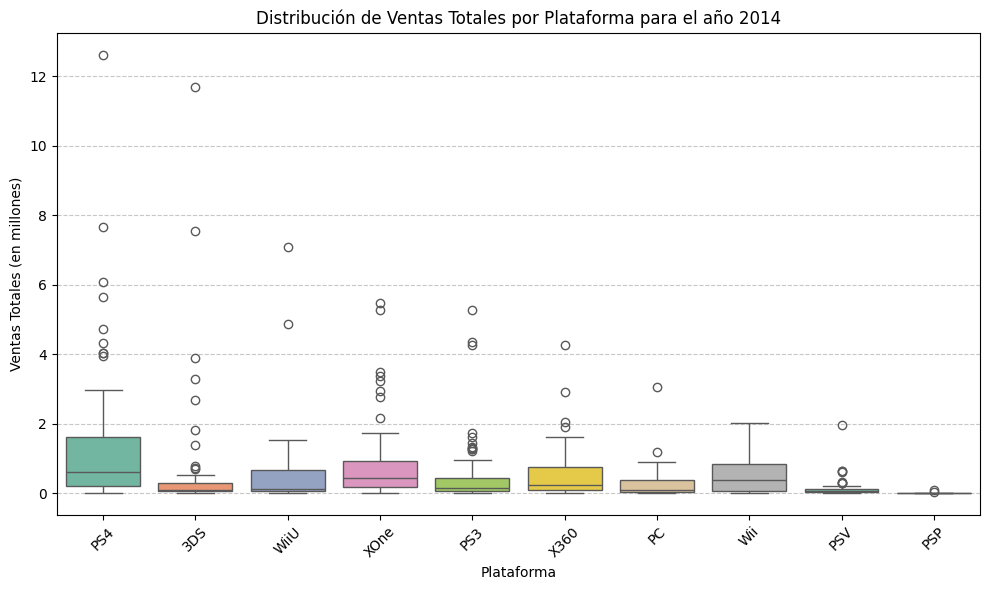

In [47]:
# Selección de las columnas con las plataformas y los costos totales
popular_platform_sales = sales_platforms_actual[["platform", "total_sales"]]

# Gráfico Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="platform", y="total_sales", hue="platform", data=popular_platform_sales, palette="Set2", legend=False)
plt.title("Distribución de Ventas Totales por Plataforma para el año 2014")
plt.xlabel("Plataforma")
plt.ylabel("Ventas Totales (en millones)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [48]:
## Calculo del promedio en ventas totales por plataforma
popular_platform_sales.groupby("platform")["total_sales"].mean().reset_index().sort_values(by="total_sales", ascending=False)

,platform,total_sales
3,PS4,1.333333
9,XOne,0.886393
7,WiiU,0.710645
6,Wii,0.625000
8,X360,0.551429
0,3DS,0.547000
2,PS3,0.442222
1,PC,0.282553
5,PSV,0.119000
4,PSP,0.024000


Se observa que existen diferencias notables en las ventas entre las distintas plataformas. La **PS4** destaca como la plataforma con el mayor número de ventas, con un juego que supera los 12 millones de unidades vendidas a nivel mundial. En contraste, algunas plataformas no alcanzan ni los 2 millones de ventas, como es el caso de la **PSP**. En términos generales, el promedio de ventas de varias plataformas es similar, especialmente entre el PS3, 3DS, Xbox 360 y Wii, lo cual resulta interesante, ya que todas estas pertenecen a la misma generación. Por otro lado, las plataformas más recientes superan el promedio general de ventas.

### Correlación puntaje de la crítica y de los usuarios
En este análisis, examinamos la relación entre las calificaciones de la crítica y de los usuarios para el PS4.

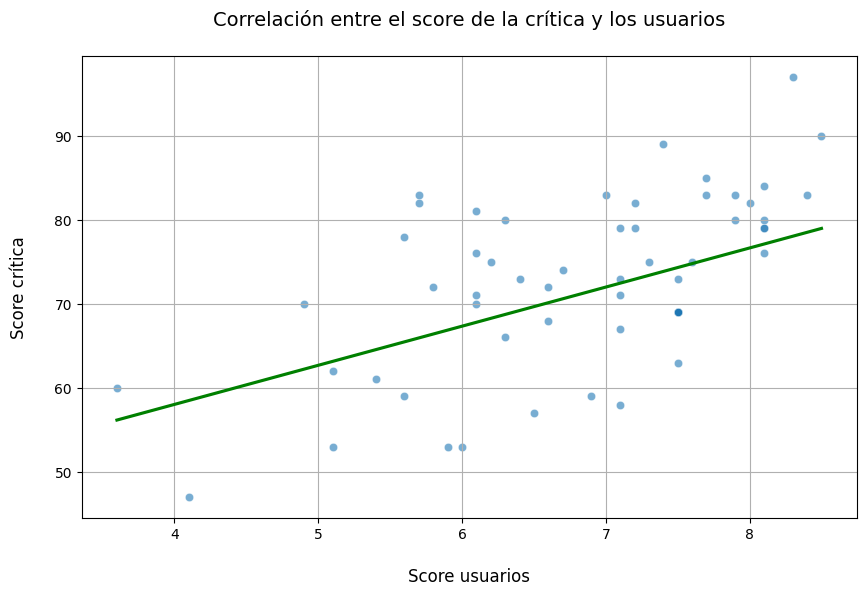

In [49]:
## Selección datos de PS4 actuales
actual_sales_score_ps4= sales_platforms_actual[sales_platforms_actual["platform"] == "PS4"]

# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x="user_score", y="critic_score", data=actual_sales_score_ps4, alpha=0.6)
sns.regplot(x="user_score", y="critic_score", data=actual_sales_score_ps4, scatter=False, color="green", ci=None) # Línea de tendencia
plt.title("Correlación entre el score de la crítica y los usuarios\n", fontsize=14)
plt.xlabel("\nScore usuarios", fontsize=12)
plt.ylabel("Score crítica\n", fontsize=12)
plt.grid(True)


plt.show()

In [50]:
## Calcular la correlación mediante el método de Pearson
corr_value, p_value = pearsonr(actual_sales_score_ps4["critic_score"], actual_sales_score_ps4["user_score"])

print(f"Coeficiente de correlación: {corr_value:.2f}")
print(f"Valor de p: {p_value:.5f}")

Coeficiente de correlación: 0.51
Valor de p: 0.00000


### Ventas del videojuego con mayor distribución
Para observar las ventas entre plataformas, seleccionamos uno de los videojuegos que más se encuentra entre diversas paltaformas: el "**Need for Spped: Most Wanted**". Para ello filtramos los datos de la tabla original. 

In [51]:
df_games.groupby(by="platform")["total_sales"].sum().reset_index().sort_values(by="total_sales")

,platform,total_sales
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42
12,NG,1.44
22,SCD,1.86
3,DC,15.95
8,GEN,28.35
21,SAT,33.59


In [52]:
## Seleción videojuego Need fos Speed (nfs)
df_nfs= df_games[df_games["name"] == "Need for Speed: Most Wanted"]
df_nfs.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.000000,9.1,T,4.37
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,68.967679,7.5,tbd,2.81
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.000000,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.000000,8.5,T,1.25
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.000000,8.8,T,1.04


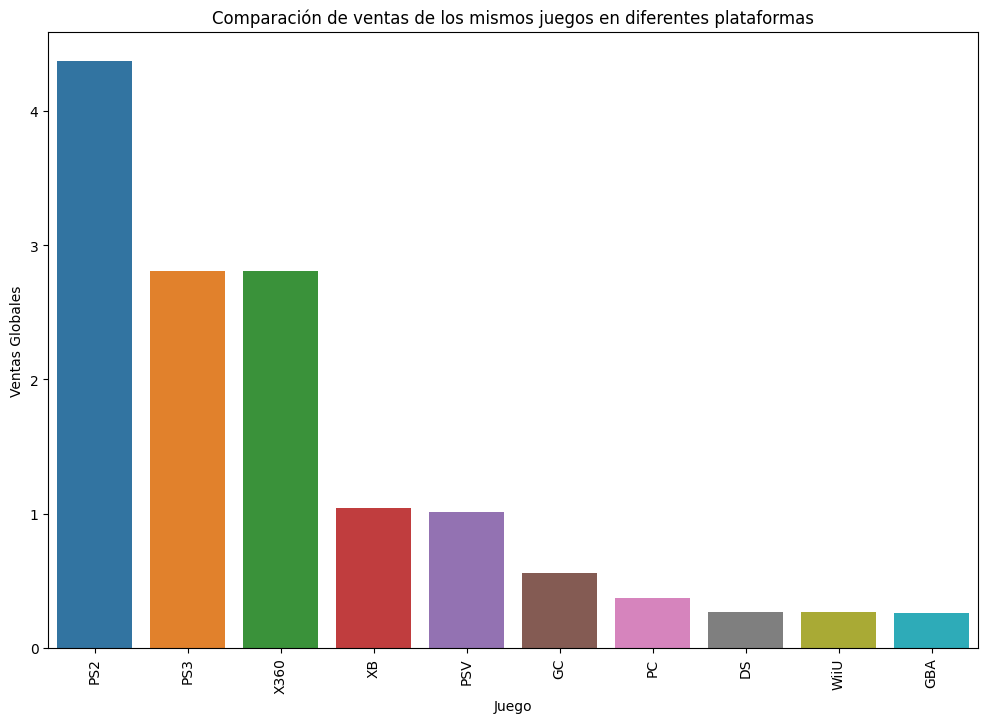

In [53]:
## Agrupacón venta total de Need for Spped por plataforma
df_nfs_platform= df_nfs.groupby(by="platform", as_index=False)["total_sales"].sum().sort_values(by="total_sales", ascending=False)

## Gráfica de barras 
plt.figure(figsize=(12, 8))
sns.barplot(x="platform", y="total_sales", hue="platform", data=df_nfs_platform)
plt.xticks(rotation=90)
plt.title("Comparación de ventas de los mismos juegos en diferentes plataformas")
plt.xlabel("Juego")
plt.ylabel("Ventas Globales")
plt.show()

El juego más popular entre las diferentes plataformas fue **Need for Speed: Most Wanted**, ya que estuvo disponible en 10 plataformas distintas. Al analizar las ventas, observamos que los registros en PlayStation superaron a los de Xbox. Además, notamos que las plataformas de Nintendo mostraron un patrón de ventas considerablemente diferente al de las grandes marcas como Sony y Microsoft.

### Género mas redituable
En cuenta al análisis de ventas por géneros. Agrupamos los videojuegos de acuerdo a su género, utilizando la 

In [54]:
## Agrupar por género
df_genre_summary = df_games.groupby("genre", as_index=False).agg({"total_sales": ["sum", "mean", "min", "max"]})

## Aplanar las columnas 
df_genre_summary.columns = ['genre', 'total_sales_sum', 'total_sales_mean', 'total_sales_min', 'total_sales_max']

## Ordenar por el total de ventas de mayor a menor
df_genre_summary = df_genre_summary.sort_values(by="total_sales_sum", ascending=False)
df_genre_summary


,genre,total_sales_sum,total_sales_mean,total_sales_min,total_sales_max
0,Action,1744.17,0.517711,0.01,21.05
10,Sports,1331.27,0.566980,0.00,82.54
8,Shooter,1052.45,0.795503,0.01,28.31
7,Role-Playing,934.56,0.623872,0.01,31.38
4,Platform,827.77,0.932173,0.01,40.24
3,Misc,802.51,0.458577,0.01,28.91
6,Racing,728.67,0.583403,0.00,35.52
2,Fighting,447.53,0.527126,0.01,12.84
9,Simulation,389.97,0.446701,0.01,24.67
5,Puzzle,242.57,0.418224,0.01,30.26


In [57]:
# Géneros con ventas altas y bajas
## Determinar el promedio de la suma total de ventas por género
general_genre_mean= df_genre_summary["total_sales_sum"].mean()

## Géneros con mayor promedio de ventas 
high_sales_genres = df_genre_summary[df_genre_summary["total_sales_sum"] > general_genre_mean]
print("Géneros más populares:\n", high_sales_genres["genre"])
print()

## Géneros con menor promedio de ventas
low_sales_genres = df_genre_summary[df_genre_summary["total_sales_sum"] <= general_genre_mean]
print("Géneros menos populares:\n", low_sales_genres["genre"])


Géneros más populares:
 0           Action
10          Sports
8          Shooter
7     Role-Playing
4         Platform
3             Misc
Name: genre, dtype: object

Géneros menos populares:
 6         Racing
2       Fighting
9     Simulation
5         Puzzle
1      Adventure
11      Strategy
Name: genre, dtype: object


## Perfil para cada región

Otro de nuestros objetivos era identificar los perfiles de usuarios de acuerdo con su región geográfica. Para este análisis estratificamos de acuerdo a las principales mercados: Norteamerica, Europa y Japón. 

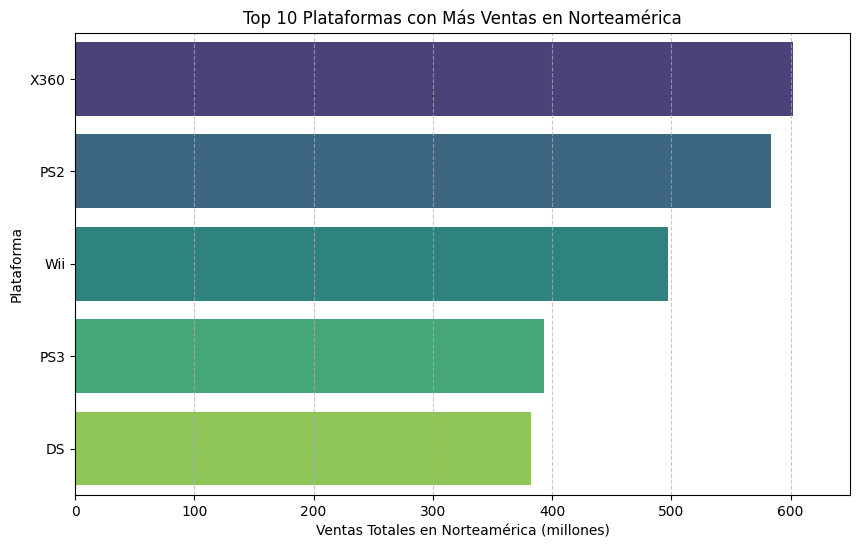

In [96]:
## Región Estados Unidos
platform_na= tidy_games[tidy_games["region"]=="na_sales"]
platform_na_top= platform_na.groupby("platform",as_index=False)["sales"].sum().sort_values(by="sales", ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=platform_na_top,
    x="sales", y="platform",
    hue="platform", palette="viridis",
    legend=False)

plt.xlabel("Ventas Totales en Norteamérica (millones)")
plt.ylabel("Plataforma")
plt.title("Top 10 Plataformas con Más Ventas en Norteamérica")
plt.xlim(0, 650)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

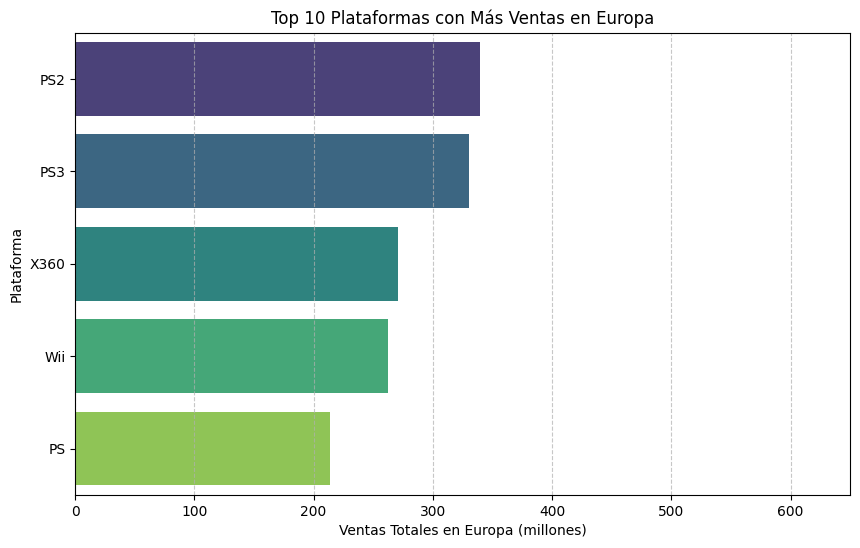

In [95]:
## Región Europa
platform_eu= tidy_games[tidy_games["region"]=="eu_sales"]
platform_eu_top= platform_eu.groupby("platform",as_index=False)["sales"].sum().sort_values(by="sales", ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=platform_eu_top,
    x="sales", y="platform",
    hue="platform", palette="viridis",
    legend=False)

plt.xlabel("Ventas Totales en Europa (millones)")
plt.ylabel("Plataforma")
plt.title("Top 10 Plataformas con Más Ventas en Europa")
plt.xlim(0, 650)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

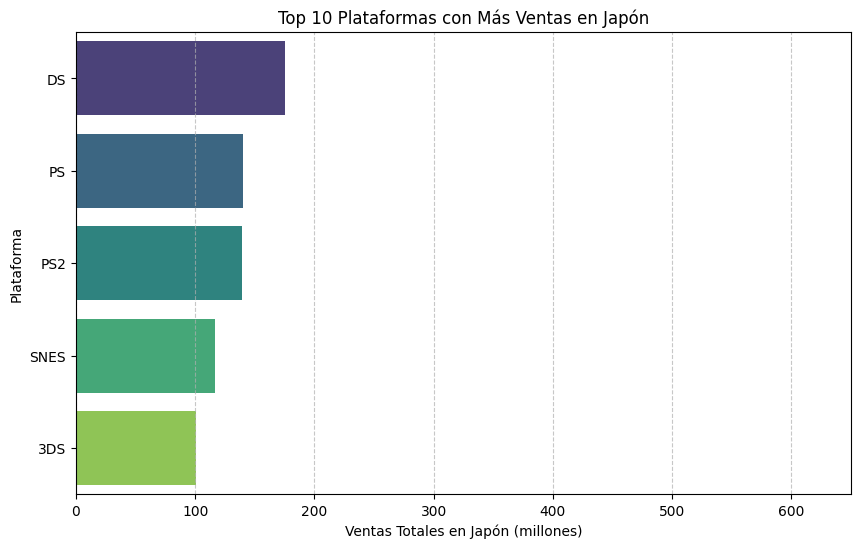

In [94]:
## Región Japón
platform_jp= tidy_games[tidy_games["region"]=="jp_sales"]
platform_jp_top= platform_jp.groupby("platform",as_index=False)["sales"].sum().sort_values(by="sales", ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=platform_jp_top,
    x="sales", y="platform",
    hue="platform", palette="viridis",
    legend=False)

plt.xlabel("Ventas Totales en Japón (millones)")
plt.ylabel("Plataforma")
plt.title("Top 10 Plataformas con Más Ventas en Japón")
plt.xlim(0, 650)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Al analizar las plataformas más vendidas en cada región, notamos diferencias en las preferencias de los jugadores. Norteamérica es la región con mayor consumo de videojuegos, con el Xbox 360 como la consola más vendida, seguida por la PS2 y, en tercer lugar, la Wii. En Europa, la preferencia se inclina hacia las plataformas de Sony, destacando la PS2 y la PS3; sin embargo, sus ventas no superan los 400 millones de unidades, a diferencia del mercado norteamericano. Por otro lado, en Japón, las consolas más populares son la Nintendo DS, la PlayStation y la PS2, con una notable ausencia del Xbox 360 en el ranking de las más vendidas.

In [114]:
## Agrupar clasificación por región
df_rating= df_games.groupby("rating", as_index=False)[["na_sales", "eu_sales", "jp_sales"]].sum()
df_rating

,rating,na_sales,eu_sales,jp_sales
0,AO,1.26,0.61,0.00
1,E,1292.99,710.25,198.11
2,E10+,353.32,188.52,40.20
3,EC,1.53,0.11,0.00
4,K-A,2.56,0.27,1.46
5,M,748.48,483.97,64.24
6,RP,0.00,0.08,0.00
7,T,759.75,427.03,151.40
8,tbd,1240.68,613.30,841.93


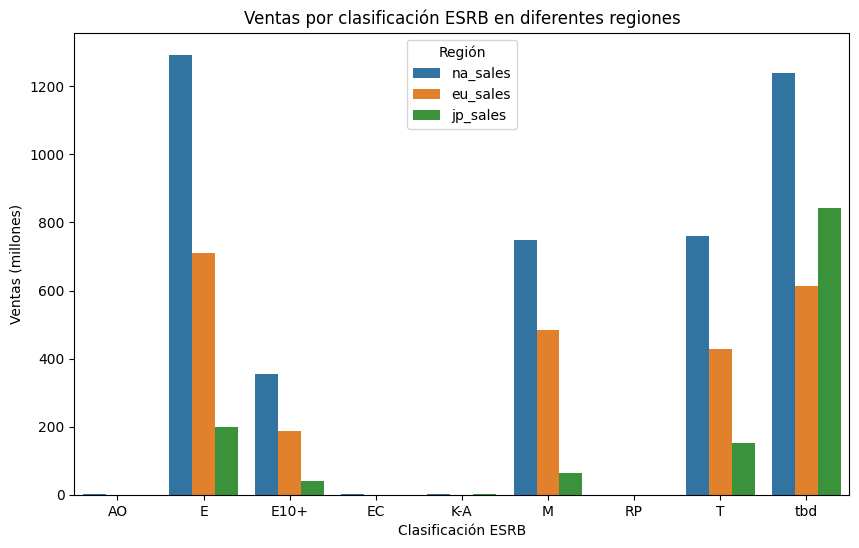

In [115]:
## Convertir en formato long 
df_rating_long = df_rating.melt(id_vars="rating", 
                                          var_name="region", 
                                          value_name="sales")
df_rating_long

## Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x="rating", y="sales", hue="region", data=df_rating_long)
plt.title("Ventas por clasificación ESRB en diferentes regiones")
plt.xlabel("Clasificación ESRB")
plt.ylabel("Ventas (millones)")
plt.legend(title="Región")
plt.show()

En general, observamos que hay cuatro clasificaciones ESRB predominantes en todas las regiones: E, M, T y E10+, en ese mismo orden de popularidad. El dominio de la clasificación "E" podría indicar que los juegos familiares y aptos para todas las edades tienen mayor presencia en el mercado global. Además, una cantidad significativa de videojuegos aún no cuentan con clasificación, especialmente en la región de Japón. 

## Pruebas de hipótesis

### Calificaciones de usuarios X box One vs PC
Queremos determinar si las calificaciones de los usuarios difieren entre las plataformas Xbox One y PC. Para ello, planteamos las siguientes hipótesis:

- *H0*: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son similares.
- *HA*: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son distintas.

Para evaluar esta hipótesis, utilizamos una prueba estadística con un nivel de significancia (α) de 0.05, lo que implica que existe un 95% de confianza en los resultados, aceptando un margen de error del 5% debido a la variabilidad aleatoria.

In [131]:
# Comparación Estadística (Prueba de T)
## Xbox One
xonescore= df_games_selected[df_games_selected["platform"]=="XOne"]["user_score"]

## PC
pc_score= df_games_selected[df_games_selected["platform"]=="PC"]["user_score"]


## Prueba homocedasticidad de varianzas
stat_levene, p_levene = levene(xonescore, pc_score)
print(f"P-valor de Levene: {p_levene:.3f}")


## Prueba t de Student
t_stat, p_value = ttest_ind(xonescore, pc_score, equal_var=True)


print(f"Estadístico de prueba: {t_stat:.3f}")
print(f"P-valor: {p_value:.3f}")

## Promedios
print("Promedio calificación de los usuariosn Xbox One:",round(xonescore.mean(),2))
print("Promedio calificación de los usuariosn PC:",round(pc_score.mean(),2))

P-valor de Levene: 0.764
Estadístico de prueba: -4.181
P-valor: 0.000
Promedio calificación de los usuariosn Xbox One: 5.99
Promedio calificación de los usuariosn PC: 7.24


De acuerdo con los resultados obtenidos para los datos del período 2000-2013, se encontró una diferencia significativa en la calificación promedio de los usuarios entre Xbox One y PC. Específicamente, las calificaciones de los usuarios en PC son estadísticamente más altas en comparación con las de Xbox One.

### Calificaciones de usuarios X box One vs PC

Queremos determinar si las calificaciones de los usuarios difieren entre los géneros de acción y deporte. Para ello, planteamos las siguientes hipótesis:

- *H0*: Las calificaciones promedio de los usuarios para los géneros de acción y deporte son similares.
- *HA*: Las calificaciones promedio de los usuarios para los géneros de acción y deporte son distintas.

Para evaluar esta hipótesis, utilizamos una prueba estadística con un nivel de significancia (α) de 0.05, lo que implica que existe un 95% de confianza en los resultados, aceptando un margen de error del 5% debido a la variabilidad aleatoria.

In [132]:
df_games_selected["genre"].unique()

array(['Sports', 'Racing', 'Platform', 'Misc', 'Simulation', 'Action',
       'Role-Playing', 'Puzzle', 'Shooter', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [ ]:
# Comparación Estadística (Prueba de T)
## Accion
action_score= df_games_selected[df_games_selected["genre"]=="Action"]["user_score"]

## PC
sports_score= df_games_selected[df_games_selected["genre"]=="Sports"]["user_score"]


## Prueba homocedasticidad de varianzas
stat_levene, p_levene = levene(action_score, sports_score)
print(f"P-valor de Levene: {p_levene:.3f}")

## Prueba t de Student
t_stat, p_value = ttest_ind(action_score, sports_score, equal_var=False)


print(f"Estadístico de prueba: {t_stat:.3f}")
print(f"P-valor: {p_value:.3f}")

## Promedios
print("Promedio calificación de los usuariosn Acción:",round(action_score.mean(),2))
print("Promedio calificación de los usuariosn Deportes:",round(sports_score.mean(),2))

P-valor de Levene: 0.003
Estadístico de prueba: -2.114
P-valor: 0.035
Promedio calificación de los usuariosn Xbox One: 7.26
Promedio calificación de los usuariosn PC: 7.33


De acuerdo con los resultados obtenidos para los datos del período 2000-2013, se encontró una diferencia significativa en la calificación promedio de los usuarios entre los géneros de acción y de deportes. Específicamente, las calificaciones de los usuarios de videojuegos de dporten son ligeramente mayores pero estadísticamente distintas a las calificaciones de los videojuegos de acción.